# User Churn Prediction 

<p>Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.</p>
<style>
    p::first-letter {
        font-size: 200%;
    }
</style>

## Data Exploration

### Raw Data

<ul style="visibility:hidden">
    <li>Data Source: https://www.sgi.com/tech/mlc/db/churn.all</li>
    <li>Data info: https://www.sgi.com/tech/mlc/db/churn.names</li>
</ul>

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('data/churn.all')

In [4]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
print('Number of rows:\t\t%d' % churn_df.shape[0])
print('Number of columns:\t%d' % churn_df.shape[1])

Number of rows:		5000
Number of columns:	21


### Data Cleaning

remove extra whitespace

In [6]:
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [7]:
for c in churn_df.columns:
    if (str(churn_df[c][0])[0] == ' ' or str(churn_df[c][0])[-1] == ' '):
        print(c)

phone_number
intl_plan
voice_mail_plan
churned


In [8]:
for c in churn_df.columns:
    print(c)
    print(churn_df[c][0])

state
KS
account_length
128
area_code
415
phone_number
 382-4657
intl_plan
 no
voice_mail_plan
 yes
number_vmail_messages
25
total_day_minutes
265.1
total_day_calls
110
total_day_charge
45.07
total_eve_minutes
197.4
total_eve_calls
99
total_eve_charge
16.78
total_night_minutes
244.7
total_night_calls
91
total_night_charge
11.01
total_intl_minutes
10.0
total_intl_calls
3
total_intl_charge
2.7
number_customer_service_calls
1
churned
 False.


In [9]:
def removeSpace(df) :
    lc = list()
    for c in df.columns:
        s = str(df[c][0])
        if (s[0] == ' ' or s[-1] == ' ' ):
            lc.append(c)
    for c in lc:
        df[c] = df[c].map(lambda x: x.strip())
    

In [10]:
removeSpace(churn_df)

In [11]:
# not ready to remove 

churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Features

/home/c830g420/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


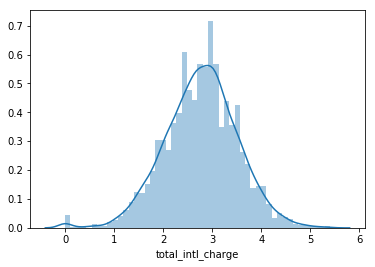

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=True)

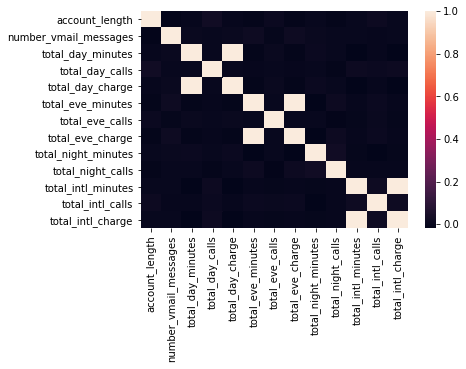

In [13]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()
sb.heatmap(corr)

In [14]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [15]:
from scipy.stats import pearsonr

print (pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0])

0.005381375960654535


### Feature Processing

In [16]:
y = np.where(churn_df['churned'] == 'True.', 1, 0)

In [17]:
y[::50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [18]:
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'


In [19]:
churn_feat_space.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [27]:
X = churn_feat_space.values.astype(np.float)

In [22]:
# churn_feat_space.values

array([[128, False, True, ..., 3, 2.7, 1],
       [107, False, True, ..., 3, 3.7, 1],
       [137, False, False, ..., 5, 3.29, 0],
       ...,
       [61, False, False, ..., 4, 3.67, 1],
       [109, False, False, ..., 6, 2.3, 0],
       [86, False, True, ..., 16, 2.51, 0]], dtype=object)

In [26]:
# churn_feat_space.values.astype(np.float)

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 61.  ,   0.  ,   0.  , ...,   4.  ,   3.67,   1.  ],
       [109.  ,   0.  ,   0.  , ...,   6.  ,   2.3 ,   0.  ],
       [ 86.  ,   0.  ,   1.  , ...,  16.  ,   2.51,   0.  ]])

In [25]:
# X

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 61.  ,   0.  ,   0.  , ...,   4.  ,   3.67,   1.  ],
       [109.  ,   0.  ,   0.  , ...,   6.  ,   2.3 ,   0.  ],
       [ 86.  ,   0.  ,   1.  , ...,  16.  ,   2.51,   0.  ]])

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print('Feature space holds %d observations and %d features' % X.shape)
print('Unique target labels:', np.unique(y))

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]


In [29]:
# np.unique(np.array([1,2,3,4,5,6,7,7,7,7,8,8,9,9,9]))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Model Training and Result Evaluation

## K-fold Cross-Validation

In [30]:
from sklearn.model_selection import KFold

def run_cv(X, y, clf_class, **kwargs) :
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    
    for train, test in kf.split(X) :
        X_train, X_test = X[train], X[test]
        y_train = y[train]
        
        clf.fit(X_train, y_train)
        y_pred[test] = clf.predict(X_test)
    
    return y_pred
    
    

## Supervised Learning Models and Calculate Accuracy

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def accuracy(y_true, y_pred) :
    return np.mean(y_true == y_pred)


In [67]:
LR_CV_result = run_cv(X, y, LogisticRegression)
RF_CV_result = run_cv(X, y, RandomForestClassifier)
KNN_CV_result = run_cv(X, y, KNeighborsClassifier)

In [34]:
# clfss = KNeighborsClassifier()

In [61]:
# xia = clfss.fit([[10],[20],[39],[43],[5],[7],[4]],[0,1,1,1,0,0,0])

In [62]:
# xia.predict([[32], [3], [1]])

array([1, 0, 0])

In [64]:
# clf_class(LogisticRegression)

In [68]:
print('Logistic Regression (L2 is default): \t%.4f' 
      % accuracy(y, LR_CV_result))
print('Random Forest: \t%.4f' 
     % accuracy(y, LR_CV_result))
print('K-nearest-neighbors: \t.4f' )

Logistic Regression (L2 is default): 	0.8638
